In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
rewriting = pd.read_csv("../Data/expressiveness/rewriting.txt")
hippo = pd.read_csv("../Data/expressiveness/hippo.txt")

In [10]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [11]:
percentage_df = pd.DataFrame()
percentage_df["queryid"] = rewriting["queryid"]
percentage_df["querytime"] = percentage_change(rewriting["querytime"], hippo["querytime"])
percentage_df["querysize"] = percentage_change(rewriting["querysize"], hippo["querysize"])
percentage_df = percentage_df.sort_values(by='queryid', ascending=True)
percentage_df.tail()

,queryid,querytime,querysize
12,17,NaN,-17.617738
13,18,NaN,-9.988827
14,19,NaN,-19.085427
15,20,NaN,-7.021792
16,21,NaN,-19.764981


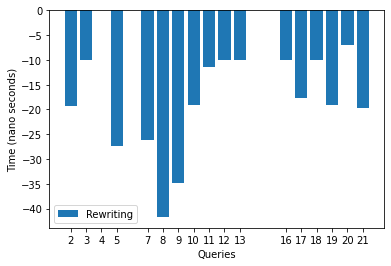

In [12]:
# small fig with uneven distribution

fig, ax = plt.subplots()

ax.bar(percentage_df["queryid"], percentage_df["querysize"], label="Rewriting")

ax.set_xlabel('Queries')
ax.set_ylabel('Time (nano seconds)')
ax.set_xticks(percentage_df["queryid"])

ax.legend()

plt.show()

In [13]:
queries = ["2", "3", "5", "7", "8", "9", "10", "11", "12", "13", "16", "17", "18", "19", "20", "21"]

percentage_df = percentage_df.drop(percentage_df.index[2])  # removing 4 (index 2)

group_size = 2
group_width = 1

q_range = np.arange(0, len(queries), group_width)

# amount to move across in group 
# bar_width(1) is just the bar_width
def bar_width(n):
    return (group_width /group_size) * n

# Dealing with font sizes
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

In [14]:
print(percentage_df)

    queryid  querytime  querysize
0         2        NaN -19.305136
1         3        NaN -10.035855
3         5        NaN -27.339202
4         7        NaN -26.073331
5         8        NaN -41.779520
6         9        NaN -34.801419
7        10        NaN -19.084301
8        11        NaN -11.405836
9        12        NaN  -9.939533
10       13        NaN -10.000000
11       16        NaN -10.000000
12       17        NaN -17.617738
13       18        NaN  -9.988827
14       19        NaN -19.085427
15       20        NaN  -7.021792
16       21        NaN -19.764981


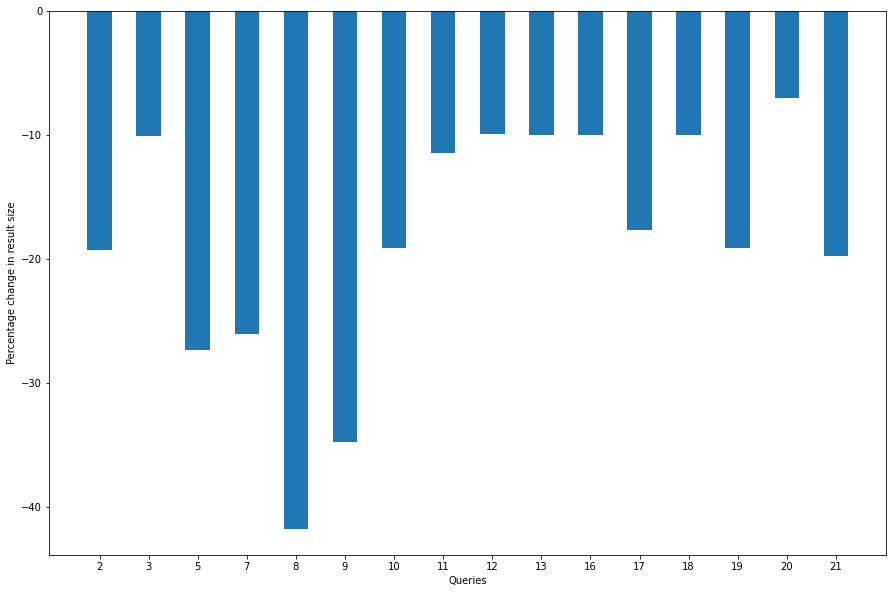

In [15]:
%matplotlib inline

plt.figure(figsize=(15,10))

plt.bar(q_range + bar_width(0), percentage_df["querysize"], bar_width(1), align='center')

plt.xlabel('Queries')
plt.ylabel('Percentage change in result size')
plt.xticks(q_range, queries)

# Dealing with font sizes
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 50

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

plt.savefig('percentage-difference-size.jpg')